# 프로젝트 목적

패스트캠퍼스 온라인 강의 결제 내역 데이터를 보고 데이터 사이언스가 되었다고 가정하여 데이터를 분석해 본다.

## 데이터 보기 전 분석해 볼 것 생각해보기

01 고객군 분석 : 패스트캠퍼스에서 강의를 구매하는 사람들은 어떤 그룹으로 분류되며 어떤 특징을 가질 것인가?

02 콘텐츠 기획 분석 : 사람들은 어떤 콘텐츠를 많이 구매할까? 마케팅 효과가 있는지, 특정 그룹의 상품이 효과가 있는지 등을 확인

03 시기별 분석 : 어떤 년도, 월에 강의 콘텐츠 구매가 높을까? 어떤 시기에 구매율이 높고 왜 높은지 생각(코로나, 재택근무, 마케팅 증가 등)

04 금액별 분석 : 판매 되는 가격과 실제 결제 가격의 차이가 얼마나 될까? 쿠폰할인, PG사 포인트할인 등을 사용해 얼마나 할인을 받아 구매가 이루어지는지, 쿠폰을 안쓰는 사람들은 얼마나 있는지

05 강의별 분석 : 많이 구매된 강의는 어떤 특징을 가질까? 판매 시점부터 얼마나 지나서 구매가 많이 이루어질지 생각, 환불율이 높은 강의는 어떤 강의인지 분석, 금액이 높은강의가 잘 팔릴지, 낮은 강의가 잘 팔릴지

시기 강의

# 데이터 불러오기

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/공유용/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [ ]:
# 폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')]

## 데이터 설명 및 가설 설정

  id : 해당 거래내역에 대한 ID (PK)

  customer_id : 결제한 고객 ID

  course_id : 강의 ID(프로모션에 대해서는 값이 할당되어 있지 않음)

  type : 거래의 종류

  state : 거래에 대한 상태

  course_title : 강의 제목

  category_title : 대분류

  format : 온라인 강의의 기획 종류

  completed_at : state가 COMPLETED로 변경된 시점

  transaction_amount : 최종 결제 금액

  coupon_title : 쿠폰 종류

  coupon_dicount_amount : 쿠폰 할인 금액

  sale_price : 판매 금액

  tax_free_amount : 보안상 컬럼 삭제 *

  pg : PG사 종류

  method : 결제 방식

  subcategory_title : 중분류

  marketing_start_at : 강의 판매 시점





# EDA

In [ ]:
# 컬럼명 바꾸기
df.rename(columns={'transaction_amount':'payment_amount'},inplace = True)
df.rename(columns={'pg':'agent'},inplace = True)

실제 데이터를 뜯어보아서 목적에 영향을 낄칠 데이터와 아닌 것을 잡는 과정

In [ ]:
#데이터 타입 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   payment_amount          105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [ ]:
#기초 통계량 확인

df.describe()

,id,customer_id,course_id,payment_amount,coupon_discount_amount,sale_price,tax_free_amount
count,1.054190e+05,105416.000000,100212.000000,1.054190e+05,3.181700e+04,1.042910e+05,1.042910e+05
mean,1.147054e+06,417248.252742,203868.586327,1.464814e+05,4.972172e+04,1.610808e+05,1.575551e+05
std,1.125898e+05,206414.496648,1534.583331,7.195061e+05,5.624467e+04,3.955298e+05,3.898133e+05
min,5.679930e+05,16.000000,2516.000000,-4.144074e+06,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.048940e+06,256401.000000,203100.000000,8.350000e+04,2.000000e+04,1.090000e+05,1.090000e+05
50%,1.135186e+06,501046.000000,203787.000000,1.175000e+05,2.100000e+04,1.320000e+05,1.320000e+05
75%,1.240472e+06,566595.000000,204775.000000,1.590000e+05,6.915000e+04,1.710000e+05,1.710000e+05
max,1.381657e+06,672308.000000,207742.000000,1.134000e+08,2.000000e+06,9.094000e+07,9.094000e+07


## 결측치 확인

In [ ]:
#결측치 확인
#coupon쪽에 결측치 많음
df.isnull().sum().sort_values(ascending=False)

coupon_title              73602
coupon_discount_amount    73602
subcategory_title         19829
marketing_start_at        17979
agent                     15075
method                    13096
course_id                  5207
tax_free_amount            1128
sale_price                 1128
category_title               24
course_title                 16
format                       16
customer_id                   3
id                            0
completed_at                  0
state                         0
type                          0
payment_amount                0
dtype: int64

In [ ]:
#dataframe형식으로 결측치 값과 비율을 출력

raw_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
raw_info = raw_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values(nb)'}))
raw_info = raw_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))

display(raw_info)
display(df[:5])

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,payment_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,agent,method,subcategory_title,marketing_start_at
column type,int64,float64,float64,object,object,object,object,object,datetime64[ns],int64,object,float64,float64,float64,object,object,object,datetime64[ns]
null values(nb),0,3,5207,0,0,16,24,16,0,0,73602,73602,1128,1128,15075,13096,19829,17979
null values (%),0.0,0.002846,4.939337,0.0,0.0,0.015178,0.022766,0.015178,0.0,0.0,69.818534,69.818534,1.070016,1.070016,14.300079,12.422808,18.809702,17.0548


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,payment_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,agent,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


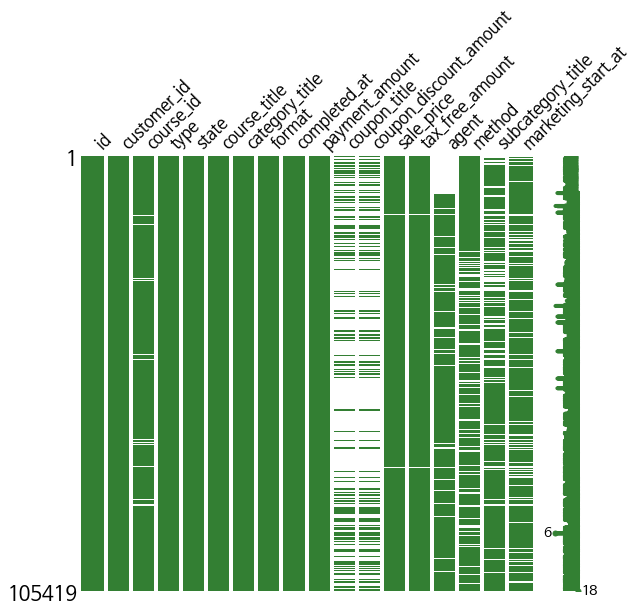

In [ ]:
#결측치 시각화
msno.matrix(df=df.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

## 데이터 전처리

In [ ]:
del df['tax_free_amount'] # 보안상 데이터 공유 불가로 컬럼 삭제

df['coupon_title'].fillna('사용안함', inplace=True) # 빈 결측치를 '쿠폰사용안함'으로 처리

df['coupon_discount_amount'].fillna(0.0,inplace=True) # 빈 결측치를 0.0 으로 처리

df['agent'].fillna('ETC', inplace=True) # pg대행사 이외의 결제는 기타(ETC)로 처리

df.drop(index=47361, axis=0, inplace=True) # 불필요한 row 삭제

df['subcategory_title'].fillna('해당없음', inplace=True) # 빈 결측치를 '해당없음'으로 처리

df['course_id'].replace('', np.nan, inplace=True)

df.dropna(subset=['course_id'], inplace=True) # DROP (null) -> 대부분 프로모션 ,한정 판매

df['sale_price'].replace('', np.nan, inplace=True)

df.dropna(subset=['sale_price'],inplace=True) # DROP (null)

KeyError: ignored

In [ ]:
# 전처리 확인
df.head(10)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,payment_amount,coupon_title,coupon_discount_amount,sale_price,agent,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,ETC,CARD,해당없음,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,ETC,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,ETC,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,사용안함,0.0,263000.0,ETC,CARD,해당없음,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02
22,970695,455311.0,203146.0,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-28 15:43:59,149500,사용안함,0.0,149500.0,ETC,CARD,DevOps,2021-02-08
28,970704,471759.0,204068.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,ETC,CARD,UX/UI,2021-03-11
29,970703,478051.0,203499.0,PAYMENT,COMPLETED,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,업무 생산성,올인원,2021-03-28 15:49:21,118000,사용안함,0.0,118000.0,ETC,VBANK,PPT/보고서,2020-12-07
31,970715,131687.0,203533.0,PAYMENT,COMPLETED,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+,데이터사이언스,올인원,2021-03-28 16:02:18,81000,사용안함,0.0,81000.0,ETC,CARD,머신러닝,2021-01-05
32,970717,43365.0,203782.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 모션그래픽,영상/3D,올인원,2021-03-28 16:03:16,139000,사용안함,0.0,139000.0,ETC,CARD,모션그래픽,2021-01-22


# EDA 진행

## type

In [ ]:
df['type'].value_counts()

PAYMENT    57895
REFUND      3637
Name: type, dtype: int64

In [ ]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.2f%%',ax=graph1)
graph1.set_title('type')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('type',data=df,ax=graph2)
graph2.set_title('type')
plt.show(fig)

NameError: ignored

## state

In [ ]:
df['state'].value_counts()

COMPLETED    53490
CANCELLED     6800
PENDING       1065
DELETED        164
REQUESTED       13
Name: state, dtype: int64

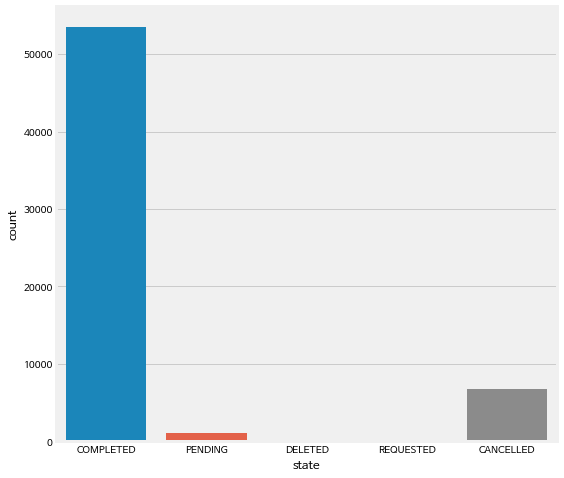

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='state')
plt.show()

## course_title

In [ ]:
df['course_title'].value_counts()

초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                          1777
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터               1657
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                          1435
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법               1276
나의 칼퇴치트키 엑셀유치원                                       1095
                                                     ... 
SQL 100제 + 자격증 완성 온라인 완주반 4기                            1
스프링 아카데미아 강의 4 - Spring REST Docs로 자동으로 API문서 만들기       1
(B2B) 라모스테크놀러지 온라인 구독 싱글 플랜                             1
(B2B) KB국민카드 온라인 구독 싱글 플랜 (데이터베이스와 SQLD 4월)             1
(B2B) 디캠프 패밀리사 온라인 구독 올 플랜 (9월)                         1
Name: course_title, Length: 389, dtype: int64

## category_title

In [ ]:
df['category_title'].value_counts()

프로그래밍       21105
업무 생산성       7621
데이터사이언스      7534
디자인          7475
영상/3D        6487
마케팅          5457
부동산/금융       3335
투자/재테크       1990
크리에이티브        414
교육             75
지식콘텐츠          26
데이터 사이언스        6
비즈니스            6
관리              1
Name: category_title, dtype: int64

### 구매가 많은 카테고리

In [ ]:
# 구매가 많은 카테고리 재구성
df1 = df.groupby('type').get_group('PAYMENT')

Text(0.5, 1.0, 'PAYMENT')

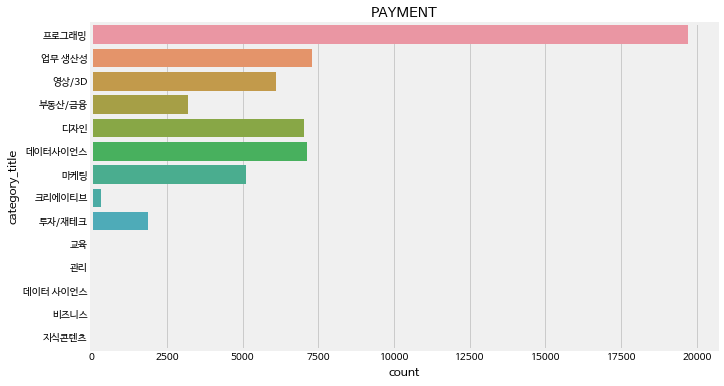

In [ ]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df1, y='category_title')
plt.title('PAYMENT')

### 환불이 많은 카테고리

In [ ]:
# 환불이 많은 카테고리 재구성
df2 = df.groupby('type').get_group('REFUND')

Text(0.5, 1.0, 'REFUND')

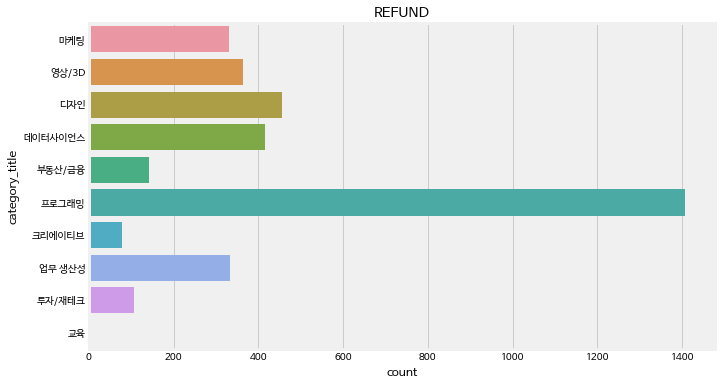

In [ ]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df2, y='category_title')
plt.title('REFUND')

## format

In [ ]:
df['format'].value_counts()

올인원        51437
RED         3965
온라인 완주반     1728
하루10분컷      1409
스쿨           957
스쿨 온라인       656
B2G          591
B2B          508
이벤트           93
B2B 온라인       79
캠프            45
아카이브          36
MBA           26
관리             1
콜로소            1
Name: format, dtype: int64

### 구매가 많은 강의 기획

In [ ]:
# 구매가 많은 카테고리 재구성
df1 = df.groupby('type').get_group('PAYMENT')

Text(0.5, 1.0, 'PAYMENT')

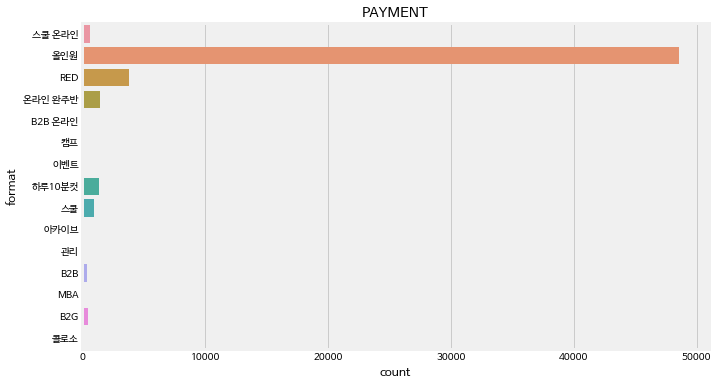

In [ ]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df1, y='format')
plt.title('PAYMENT')

### 환불이 많은 강의 기획

In [ ]:
# 환불이 많은 카테고리 재구성
df2 = df.groupby('type').get_group('REFUND')

Text(0.5, 1.0, 'REFUND')

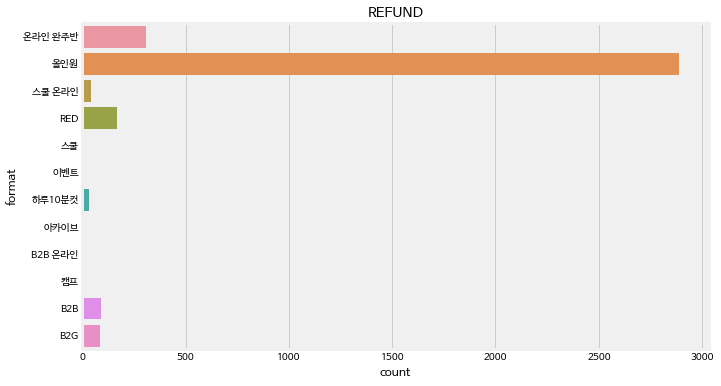

In [ ]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df2, y='format')
plt.title('REFUND')

##completed_at

In [ ]:
df['completed_at'].value_counts()

2021-09-17 14:37:49    16
2021-03-30 13:42:51    15
2021-05-03 16:15:25    10
2021-04-28 09:31:40     8
2021-08-12 13:32:10     8
                       ..
2021-05-30 20:52:20     1
2021-05-30 20:52:28     1
2021-05-30 20:52:51     1
2021-05-30 20:56:50     1
2021-09-25 14:25:47     1
Name: completed_at, Length: 60970, dtype: int64

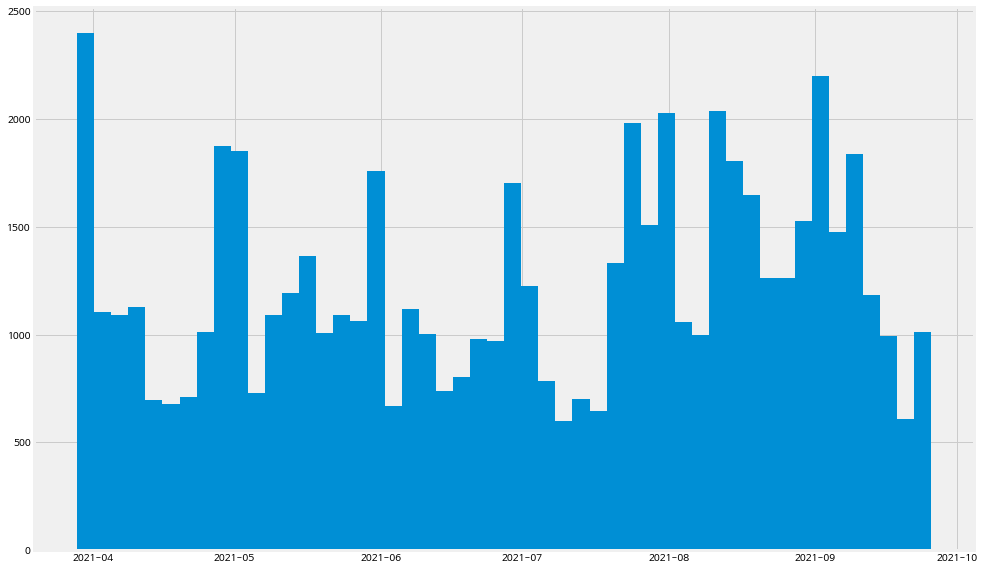

In [ ]:
# 판매가 감소하는 추세
df['completed_at'].hist(bins=50,figsize=(15,10))

In [ ]:
df = df[(df['type']=='REFUND')|(df['type']=='PAYMENT')]

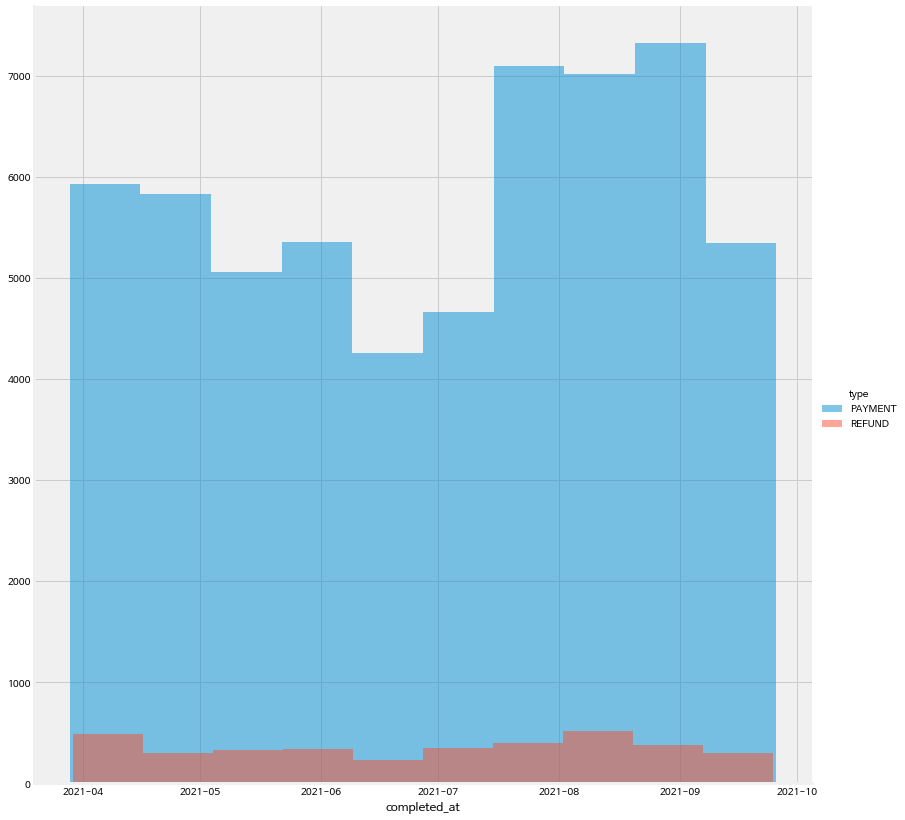

In [ ]:
# completed_at별 type
grid = sns.FacetGrid(df, hue='type', size=11.5)
grid.map(plt.hist, 'completed_at', alpha=.5)
grid.add_legend();

## payment_amount(transaction_amount)

In [ ]:
df['payment_amount'].value_counts()

 0         4733
 129000    1117
 159000    1076
 149000    1023
 119000    1000
           ... 
-103606       1
 151200       1
-314400       1
-14200        1
 285000       1
Name: payment_amount, Length: 2080, dtype: int64

In [ ]:
df_payment = df.copy()

def payment(x):
    if  x <= 50000:
        return "저렴한편"
    elif 50000 < x <= 100000:
        return "조금 저렴한편"
    elif 100000 < x <= 300000:
        return "보통"
    elif 300000 < x < 500000:
        return "조금 비싼편"
    else:
        return "비싼편"

df_payment['payment_amount'] = df_payment['payment_amount'].map(payment)
df_payment.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,payment_amount,coupon_title,coupon_discount_amount,sale_price,agent,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,보통,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,ETC,CARD,해당없음,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,조금 저렴한편,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,ETC,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,조금 저렴한편,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,ETC,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,보통,사용안함,0.0,263000.0,ETC,CARD,해당없음,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,조금 저렴한편,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02


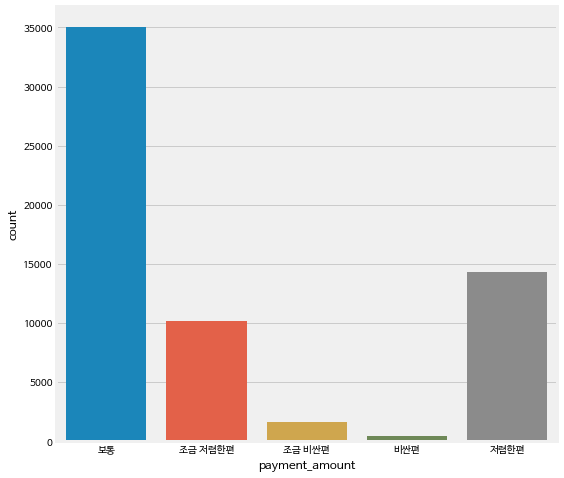

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_payment, x='payment_amount')
plt.show()

## coupon_title


In [ ]:
df['coupon_title'].value_counts()

사용안함                                         33939
[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                      3997
[WELCOME] 온라인 강의 3만원 할인쿠폰                     3179
[WELCOME] 온라인 강의 2만원 할인쿠폰                     2285
[WELCOME] 온라인 강의 1만원 할인쿠폰                     1878
                                             ...  
[무료수강권] RED 검수용_공정필 PM님                          1
[서포터즈 전용] 재무/세무 회계 실무 완성 무료 수강                   1
[서포터즈 전용] Financial Modeling 무료 수강               1
[무료수강권] 부동산 투자_이해진 강사님                           1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍        1
Name: coupon_title, Length: 482, dtype: int64

## coupon_discount_amount

In [ ]:
df['coupon_discount_amount'].value_counts()

0.0         33939
20000.0      7791
10000.0      4883
30000.0      4159
50000.0       467
            ...  
38800.0         1
55650.0         1
186500.0        1
9725.0          1
8255.0          1
Name: coupon_discount_amount, Length: 758, dtype: int64

In [ ]:
#할인금액
df_coupon = df.copy()

def coupon(x):
    if 0 < x <= 10000:
        return "할인적음"
    elif 10000 < x <= 50000:
        return "할인조금적음"
    elif 50000 < x <= 100000:
        return "할인 보통"
    elif 100000 < x <= 300000:
        return "할인 조금많음"
    else:
        return "할인많은편"

df_coupon['coupon_discount_amount'] = df_coupon['coupon_discount_amount'].map( coupon )
df_coupon.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,payment_amount,coupon_title,coupon_discount_amount,sale_price,agent,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,할인조금적음,190900.0,ETC,CARD,해당없음,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,할인조금적음,117500.0,ETC,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,할인조금적음,116000.0,ETC,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,사용안함,할인많은편,263000.0,ETC,CARD,해당없음,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,할인조금적음,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02


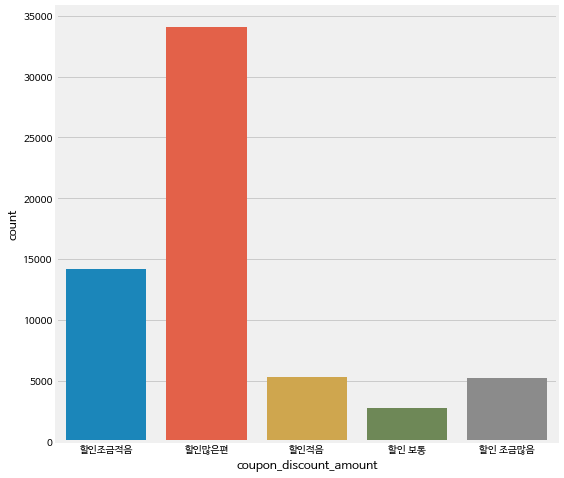

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_coupon, x='coupon_discount_amount')
plt.show()

## sale_price

In [ ]:
df['sale_price'].value_counts()

159000.0      1850
149000.0      1421
169000.0      1375
119000.0      1286
139000.0      1244
              ... 
550000.0         1
91500.0          1
859290.0         1
44600000.0       1
188500.0         1
Name: sale_price, Length: 516, dtype: int64

In [ ]:
df_sale = df.copy()

def sale(x):
    if   x <= 50000:
        return "저렴한편"
    elif 50000 < x <= 100000:
        return "조금 저렴한편"
    elif 100000 < x <= 300000:
        return "보통"
    elif 300000 < x < 500000:
        return "조금 비싼편"
    else:
        return "비싼편"

df_sale['sale_price'] = df_sale['sale_price'].map( sale )
df_sale.value_counts()

NameError: ignored

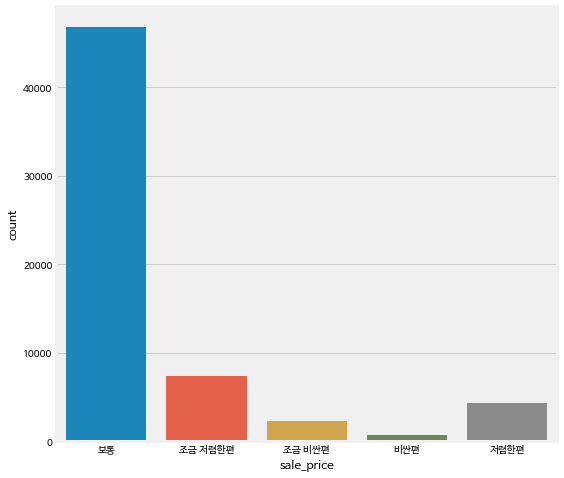

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_sale, x='sale_price')
plt.show()

### payment_amount와 sale_price 비교

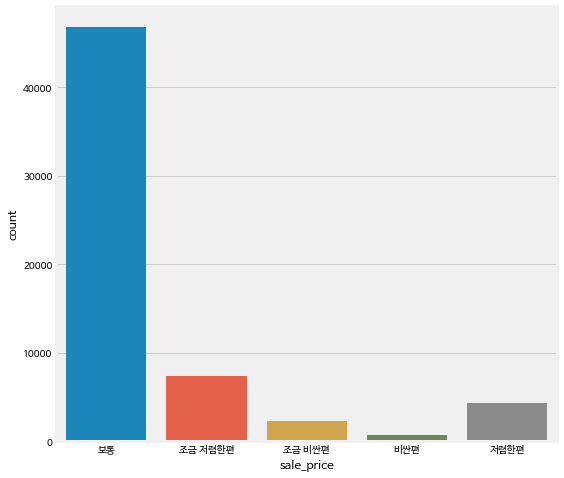

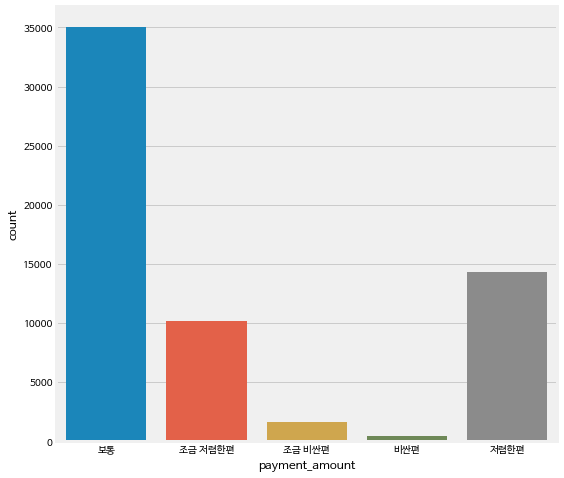

In [ ]:
graph1 = fig.add_subplot(1,2,1)
plt.figure(figsize=(8, 8))
sns.countplot(data=df_sale, x='sale_price')
plt.show()
plt.figure(figsize=(8, 8))
sns.countplot(data=df_payment, x='payment_amount')
plt.show()

## agent(pg)

In [ ]:
df['agent'].value_counts()

INICIS    32542
KAKAO     10376
ETC        9342
NAVER      6257
PAYCO      2856
CHAI        159
Name: agent, dtype: int64

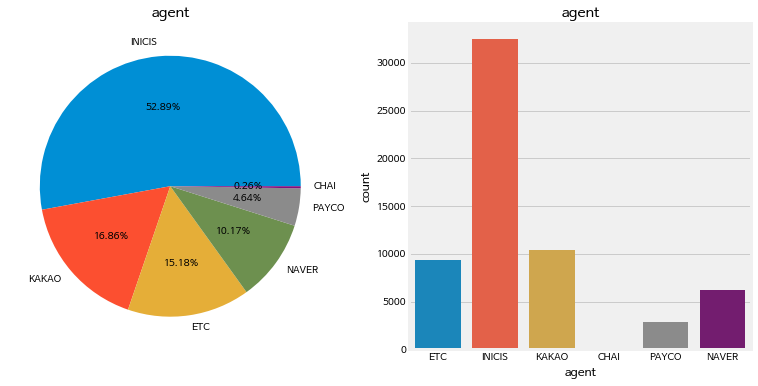

In [ ]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
df['agent'].value_counts().plot.pie(autopct='%1.2f%%',ax=graph1)
graph1.set_title('agent')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('agent',data=df,ax=graph2)
graph2.set_title('agent')
plt.show(fig)

## method

In [ ]:
df['method'].value_counts()

CARD         39473
POINT         7860
PROMOTION     4733
VBANK         4590
TRANS         1146
TRANSFER       656
ONSITE          37
VOUCHER          5
Name: method, dtype: int64

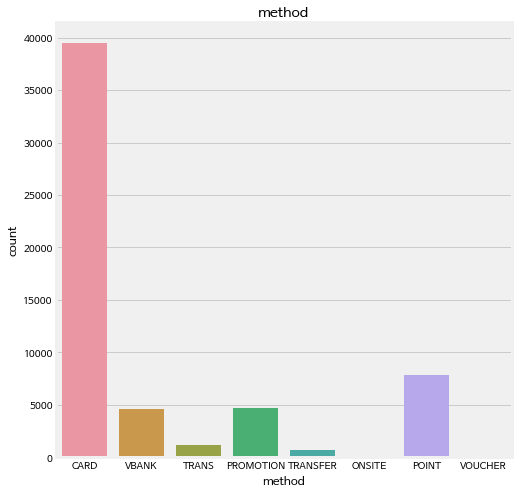

In [ ]:
fig = plt.figure(figsize=(16,8))
graph2 = fig.add_subplot(1,2,2)
sns.countplot('method',data=df,ax=graph2)
graph2.set_title('method')
plt.show(fig)

## subcategory_title

In [ ]:
df['subcategory_title'].value_counts()

해당없음         7500
영상 편집        4523
백엔드 개발       4195
개발자 커리어      3755
프론트엔드 개발     3460
딥러닝/인공지능     2792
데이터분석        2519
엑셀/VBA       2479
PPT/보고서      2469
디자인툴         2364
일러스트         2284
모바일앱         2261
글쓰기/카피라이팅    2031
UX/UI        1630
주식 투자        1517
DevOps       1499
금융/투자 실무     1392
데이터마케팅       1323
머신러닝         1254
시각디자인        1197
회계/재무/세무     1195
모션그래픽        1155
게임           1062
디지털마케팅       1033
SNS마케팅        799
부동산 개발        702
업무자동화         583
코딩 입문         556
VFX           486
부동산 투자        473
리더십           334
게임 그래픽        323
데이터엔지니어링      256
커뮤니케이션        131
Name: subcategory_title, dtype: int64

### 한번에 보기

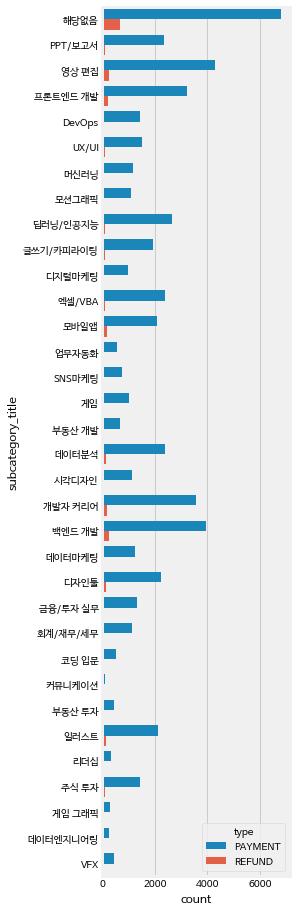

In [ ]:
# subcategory_title별 구매 환불 한번에 보기

df = df[(df['type']=='REFUND')|(df['type']=='PAYMENT')]

plt.figure(figsize=(3, 16))
sns.countplot(data=df, y='subcategory_title', hue='type')
plt.show()

### 구매가 많은 서브카테고리

In [ ]:
# 구매가 많은 카테고리 재구성
df1 = df.groupby('type').get_group('PAYMENT')

Text(0.5, 1.0, 'PAYMENT')

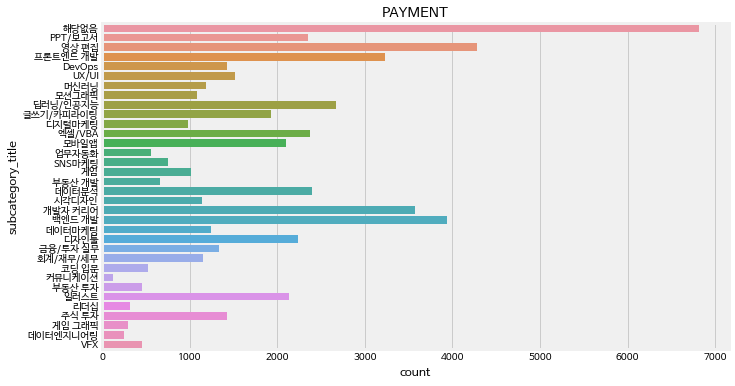

In [ ]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df1, y='subcategory_title')
plt.title('PAYMENT')

### 환불이 많은 서브카테고리

In [ ]:
# 환불이 많은 카테고리 재구성
df2 = df.groupby('type').get_group('REFUND')

Text(0.5, 1.0, 'REFUND')

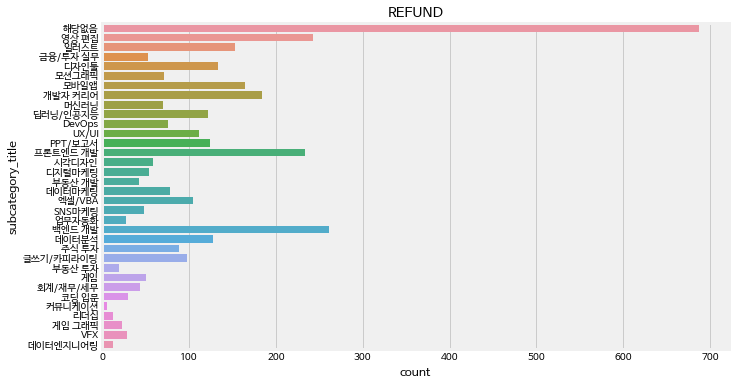

In [ ]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df2, y='subcategory_title')
plt.title('REFUND')

## marketing_start_at

In [ ]:
df['marketing_start_at'].value_counts()

2021-02-02    1799
2021-02-01    1686
2020-12-18    1556
2021-07-26    1463
2020-12-02    1450
              ... 
2021-02-15       1
2019-12-20       1
2021-04-09       1
2018-12-07       1
2021-09-16       1
Name: marketing_start_at, Length: 175, dtype: int64

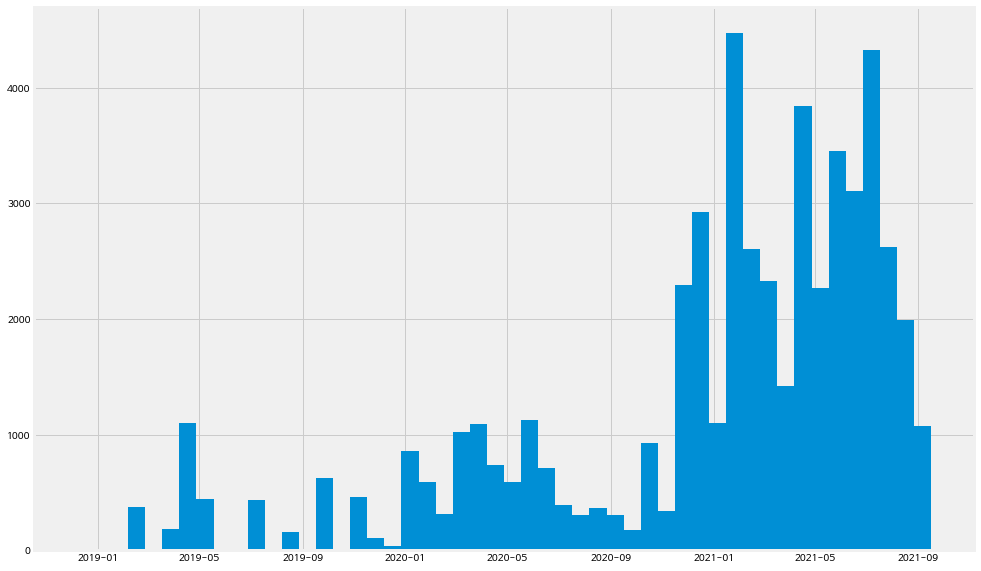

In [ ]:
df['marketing_start_at'].hist(bins=50,figsize=(15,10))

In [ ]:
df = df[(df['type']=='REFUND')|(df['type']=='PAYMENT')]

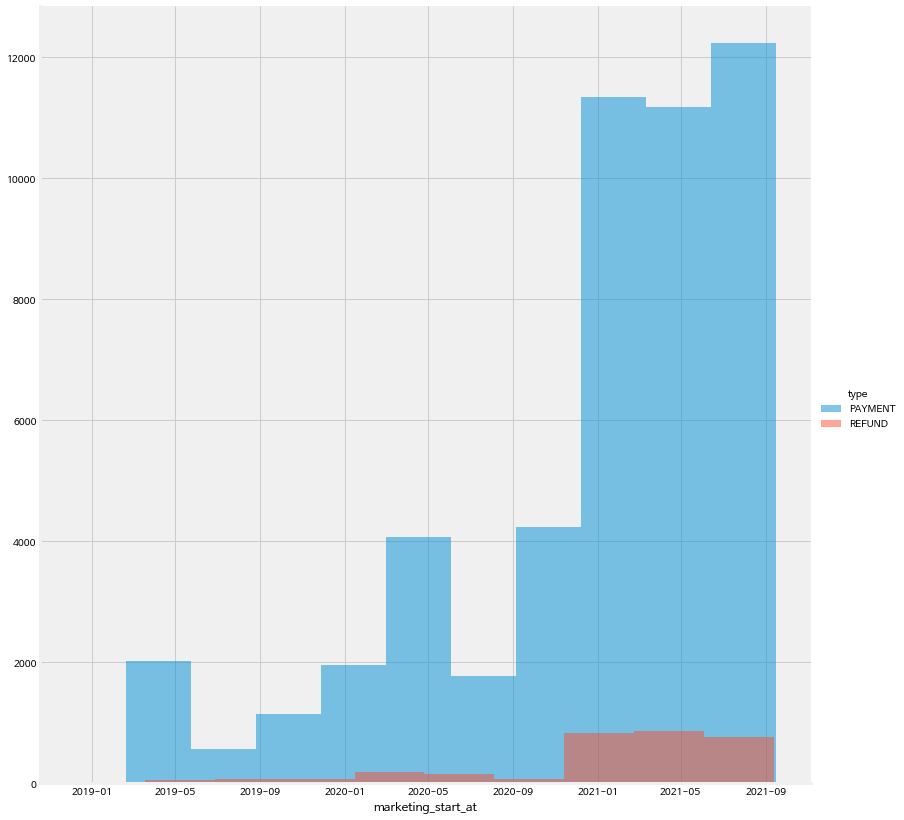

In [ ]:
#강의판매시점과 구매&환불
grid = sns.FacetGrid(df, hue='type', size=11.5)
grid.map(plt.hist, 'marketing_start_at', alpha=.5)
grid.add_legend();

# 정리